# Tasca M8 T01
**Exercicis d'algoritmes d'Agrupació.**

## Exercici 1
**Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.**

Como siempre empezaremos por importar librerias que vamos a usar mas adelante, descargamos el dataframe y empezamos a darle forma y a realizar los trabajos de limpieza.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data/Publicacions Facebook Thailandia.csv')

df.head(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
5,246675545449582_1645650162218773,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,NaN,NaN,NaN,NaN
6,246675545449582_1645564175560705,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,NaN,NaN,NaN,NaN
7,246675545449582_1644824665634656,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,NaN,NaN,NaN,NaN
8,246675545449582_1644655795651543,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,NaN,NaN,NaN,NaN
9,246675545449582_1638788379571618,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 


La columna 'status_id' es un identificador único para cada publicación y no aporta información relevante al análisis actual.

En cuanto a la columna 'status_published', contiene información de la hora y la fecha de publicación. Para mejorar su utilidad, la dividiremos en dos nuevas variables: 'date' y 'hour'. La variable 'hour' representa únicamente la hora de publicación y se categorizará como 'mañana', 'tarde' o 'noche'. La columna 'date' se transformará en el día de la semana, lo que proporcionará una perspectiva interesante para el análisis.

En cuanto a variables numéricas, viendo que 'num_reactions' no es mas que las suma de reacciones, lo que decido es crear una variables nueva 'num_others' que será todas las reacciones que no son ni 'likes', 'loves', 'wows', 'hahas', 'sads' y 'angrys' y posteriormente suprimir 'num_reactions' para evitar redundancia de la información.

Además, consideramos la eliminación de las columnas 'Column1', 'Column2', 'Column3' y 'Column4', ya que no contienen información relevante para nuestro estudio. Por lo tanto, eliminaremos estas columnas junto a 'status_id', 'status_published','date', 'hour' y 'num_reactions' del conjunto de datos. Y posteriormente, haré un reordenamiento de las variables dentro del dataframe.

In [3]:
df[['date', 'hour']] = df['status_published'].str.split(' ', n=1, expand=True)
df['hour'] = df['hour'].str.extract(r'(\d+:\d+)')[0]
df['hour'] = pd.to_datetime(df['hour'], format='%H:%M').dt.hour

def categorizar_hora(hora):
    if 6 <= hora < 14:
        return 'día'
    elif 12 <= hora < 22:
        return 'tarde'
    else:
        return 'noche'

df['categoria_hora'] = df['hour'].apply(categorizar_hora)
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df['dia_semana'] = df['date'].dt.strftime('%A')

df['num_others'] = df['num_reactions'] - (df['num_likes'] + df['num_loves'] + df['num_wows']
                                          + df['num_hahas'] + df['num_sads'] + df['num_angrys'])

df.drop(columns=['status_published', 'status_id', 'date', 'hour', 'num_reactions', 
                 'Column1', 'Column2', 'Column3', 'Column4'], inplace=True)

df = df[['status_type', 'categoria_hora', 'dia_semana', 'num_comments', 'num_shares', 
         'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'num_others']]
df

,status_type,categoria_hora,dia_semana,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_others
0,video,día,Sunday,512,262,432,92,3,1,1,0,0
1,photo,noche,Saturday,0,0,150,0,0,0,0,0,0
2,video,día,Saturday,236,57,204,21,1,1,0,0,0
3,photo,noche,Saturday,0,0,111,0,0,0,0,0,0
4,photo,noche,Wednesday,0,0,204,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,noche,Saturday,0,0,89,0,0,0,0,0,0
7046,photo,día,Friday,0,0,14,1,0,1,0,0,0
7047,photo,noche,Wednesday,0,0,1,1,0,0,0,0,0
7048,photo,noche,Tuesday,12,22,349,2,0,0,0,0,0


Una vez que hemos preparado el DataFrame a nuestro gusto, procedemos a identificar y limpiar los valores nulos, NaN y duplicados

In [4]:
df.isnull().sum()

status_type       0
categoria_hora    0
dia_semana        0
num_comments      0
num_shares        0
num_likes         0
num_loves         0
num_wows          0
num_hahas         0
num_sads          0
num_angrys        0
num_others        0
dtype: int64

In [5]:
df.isna().sum()

status_type       0
categoria_hora    0
dia_semana        0
num_comments      0
num_shares        0
num_likes         0
num_loves         0
num_wows          0
num_hahas         0
num_sads          0
num_angrys        0
num_others        0
dtype: int64

In [6]:
df.duplicated().sum()

900

In [7]:
df = df.drop_duplicates(keep='first').reset_index(drop=True)
df

,status_type,categoria_hora,dia_semana,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_others
0,video,día,Sunday,512,262,432,92,3,1,1,0,0
1,photo,noche,Saturday,0,0,150,0,0,0,0,0,0
2,video,día,Saturday,236,57,204,21,1,1,0,0,0
3,photo,noche,Saturday,0,0,111,0,0,0,0,0,0
4,photo,noche,Wednesday,0,0,204,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6145,photo,noche,Saturday,0,0,86,0,0,0,0,0,0
6146,photo,noche,Saturday,0,0,89,0,0,0,0,0,0
6147,photo,día,Friday,0,0,14,1,0,1,0,0,0
6148,photo,noche,Wednesday,0,0,1,1,0,0,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   status_type     6150 non-null   object
 1   categoria_hora  6150 non-null   object
 2   dia_semana      6150 non-null   object
 3   num_comments    6150 non-null   int64 
 4   num_shares      6150 non-null   int64 
 5   num_likes       6150 non-null   int64 
 6   num_loves       6150 non-null   int64 
 7   num_wows        6150 non-null   int64 
 8   num_hahas       6150 non-null   int64 
 9   num_sads        6150 non-null   int64 
 10  num_angrys      6150 non-null   int64 
 11  num_others      6150 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 576.7+ KB


Una vez acabados los trabajos de limpieza, comenzamos el prepocesamiento. Separamos las variables en numéricas y categóricas. Comenzaremos haciendo un estudio gráfico de estas últimas.

In [9]:
columnas_numericas = df.select_dtypes(include=['int'])
columnas_categoricas = df.select_dtypes(include=['object'])

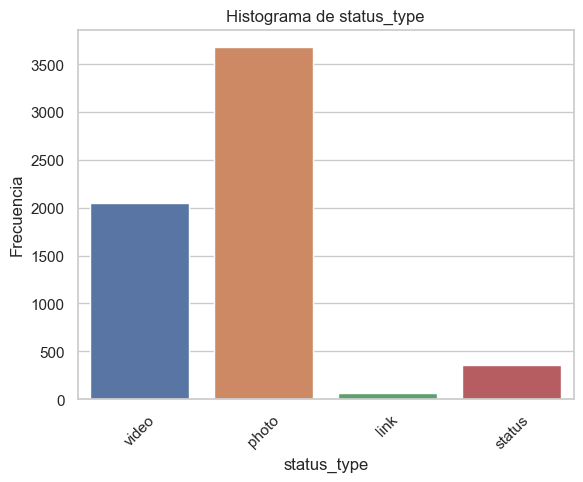

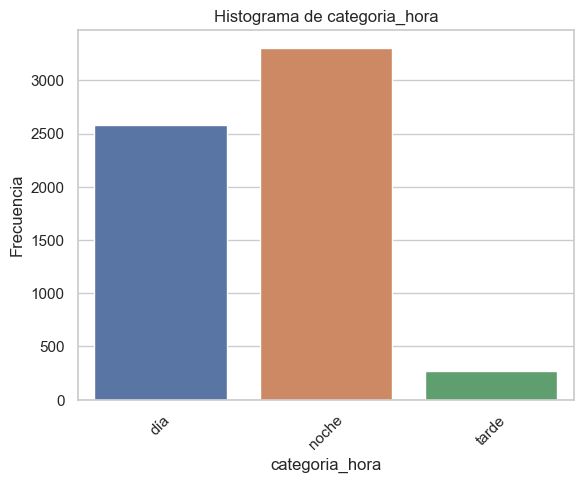

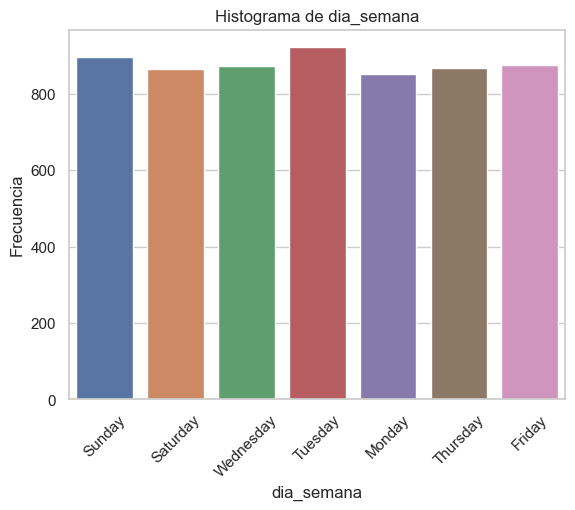

In [10]:
sns.set(style="whitegrid")

for columna in columnas_categoricas:
    sns.countplot(x=columna, data=df)
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()


Observamos que en la variable 'status_type', las publicaciones de fotos son las más comunes, seguidas de los videos, mientras que las publicaciones de enlaces y estados son bastante residuales.

En relación a 'categoria_hora', es notable que hay muy pocas publicaciones por la tarde, ya que la mayoría se concentran por la noche y en menor medida durante el día.

Respecto a 'dia_semana', notamos que la distribución de las publicaciones es casi idéntica a lo largo de cada día de la semana. Aunque esta tendencia es evidente visualmente, realizaremos un análisis de chi-cuadrado para respaldar nuestra observación.

In [11]:
from scipy.stats import chi2_contingency

dia_semana = df['dia_semana']

tabla_de_contingencia = pd.crosstab(index=dia_semana, columns='count')

chi2, p, dof, expected = chi2_contingency(tabla_de_contingencia)

print(f'Valor de chi-cuadrado: {chi2}')
print(f'P-valor: {p}')
print(f'Grados de libertad: {dof}')

alpha = 0.05 
if p < alpha:
    print('Hay diferencias significativas en la distribución de los días de la semana.')
else:
    print('No hay diferencias significativas en la distribución de los días de la semana.')


Valor de chi-cuadrado: 0.0
P-valor: 1.0
Grados de libertad: 0
No hay diferencias significativas en la distribución de los días de la semana.


En efecto, no se observan diferencias significativas en la distribución de las publicaciones según el día de la semana. Por lo tanto, he decidido eliminar esta variable del dataframe para evitar la introducción de ruido en los datos.

A continuación, procederé a crear dummies para 'status_type' y 'categoria_hora'. Es importante tener en cuenta que necesitamos eliminar la variable original y una de las dummies para evitar la duplicación de información

In [12]:
dummies_status_type = pd.get_dummies(columnas_categoricas['status_type'], prefix='type', drop_first=True)
dummies_categoria_hora = pd.get_dummies(columnas_categoricas['categoria_hora'], prefix='hora', drop_first=True)

columnas_categoricas = pd.concat([columnas_categoricas, dummies_status_type, dummies_categoria_hora], axis=1)
columnas_categoricas = columnas_categoricas.drop(['status_type','categoria_hora', 'dia_semana'], axis=1)

columnas_categoricas

,type_photo,type_status,type_video,hora_noche,hora_tarde
0,0,0,1,0,0
1,1,0,0,1,0
2,0,0,1,0,0
3,1,0,0,1,0
4,1,0,0,1,0
...,...,...,...,...,...
6145,1,0,0,1,0
6146,1,0,0,1,0
6147,1,0,0,0,0
6148,1,0,0,1,0



Terminado el preprocesamiento de las variables categóricas, comenzamos con las variables numéricas. En primer lugar, realizamos un análisis estadístico descriptivo y posteriormente creamos gráficos para comprender mejor los registros y sus distribuciones.

In [13]:
columnas_numericas.describe().T

,count,mean,std,min,25%,50%,75%,max
num_comments,6150.0,256.652683,948.185742,0.0,1.0,6.0,33.75,20990.0
num_shares,6150.0,45.813333,139.962279,0.0,0.0,1.0,6.00,3424.0
num_likes,6150.0,237.645366,462.108736,0.0,24.0,79.0,209.00,4710.0
num_loves,6150.0,14.510407,42.487037,0.0,0.0,0.0,5.00,657.0
num_wows,6150.0,1.425854,9.295196,0.0,0.0,0.0,1.00,278.0
num_hahas,6150.0,0.794309,4.227142,0.0,0.0,0.0,0.00,157.0
num_sads,6150.0,0.264715,1.577357,0.0,0.0,0.0,0.00,51.0
num_angrys,6150.0,0.125366,0.733283,0.0,0.0,0.0,0.00,31.0
num_others,6150.0,0.003089,0.089215,0.0,0.0,0.0,0.00,4.0


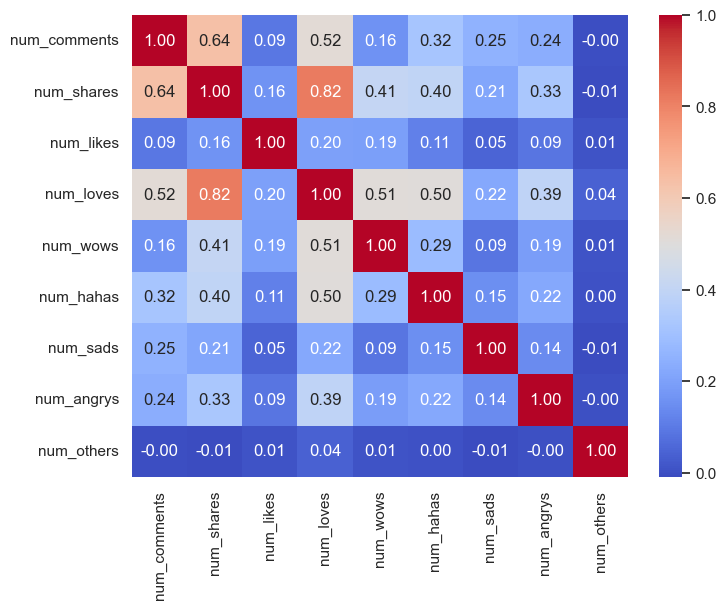

num_loves y num_shares tienen una correlación de 0.82
num_shares y num_comments tienen una correlación de 0.64


In [14]:
correlation_matrix = columnas_numericas.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap='coolwarm')
plt.show()

high_correlation_threshold = 0.6
high_correlation_vars = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_correlation_threshold:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            high_correlation_vars.append((var1, var2, correlation_matrix.iloc[i, j]))
high_correlation_vars_sorted = sorted(high_correlation_vars, key=lambda x: abs(x[2]), reverse=True)
for var1, var2, corr in high_correlation_vars_sorted:
    print(f"{var1} y {var2} tienen una correlación de {corr:.2f}")


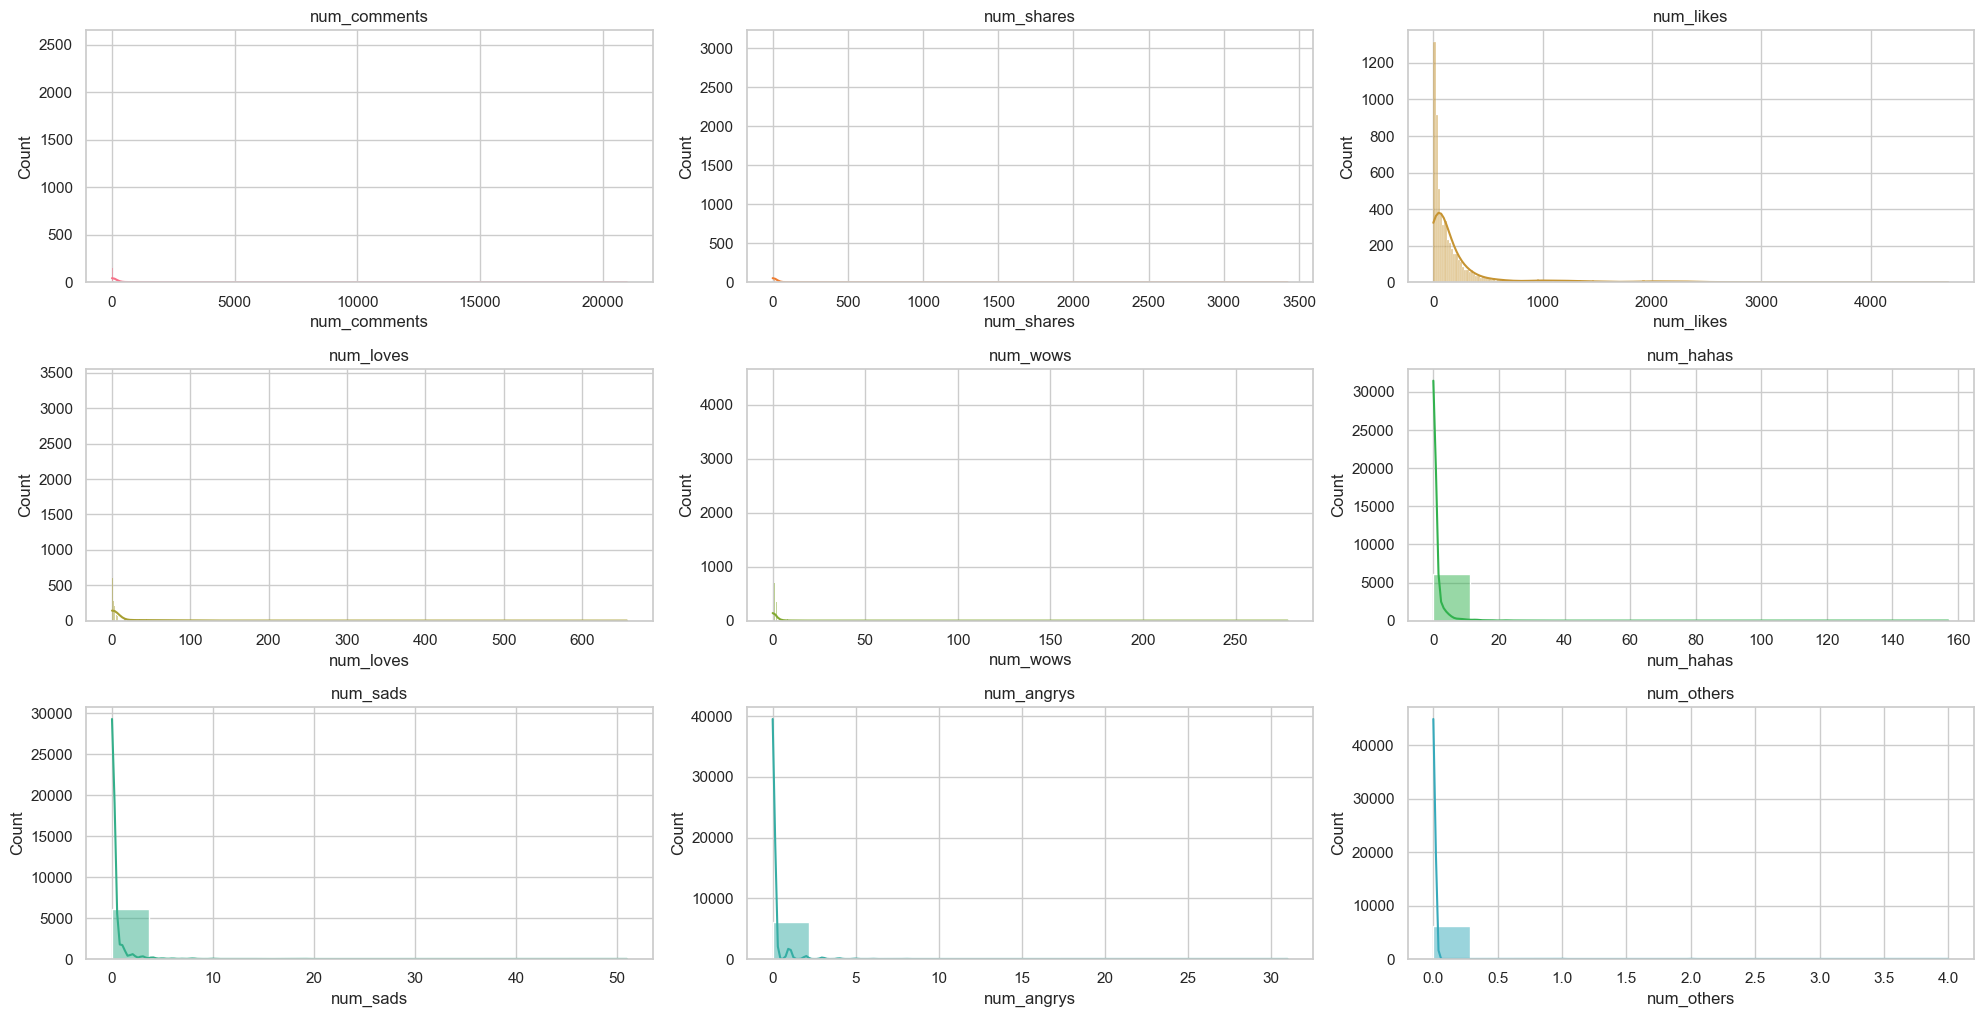

In [15]:
plt.figure(figsize=(20, 20))
palette = sns.color_palette("husl", n_colors=14)

for i, column in enumerate(columnas_numericas.columns):
    plt.subplot(6, 3, i +1  )
    sns.histplot(data=df,x=df[column],kde=True,color=palette[i])
    plt.title(f'{column}')
    plt.tight_layout()

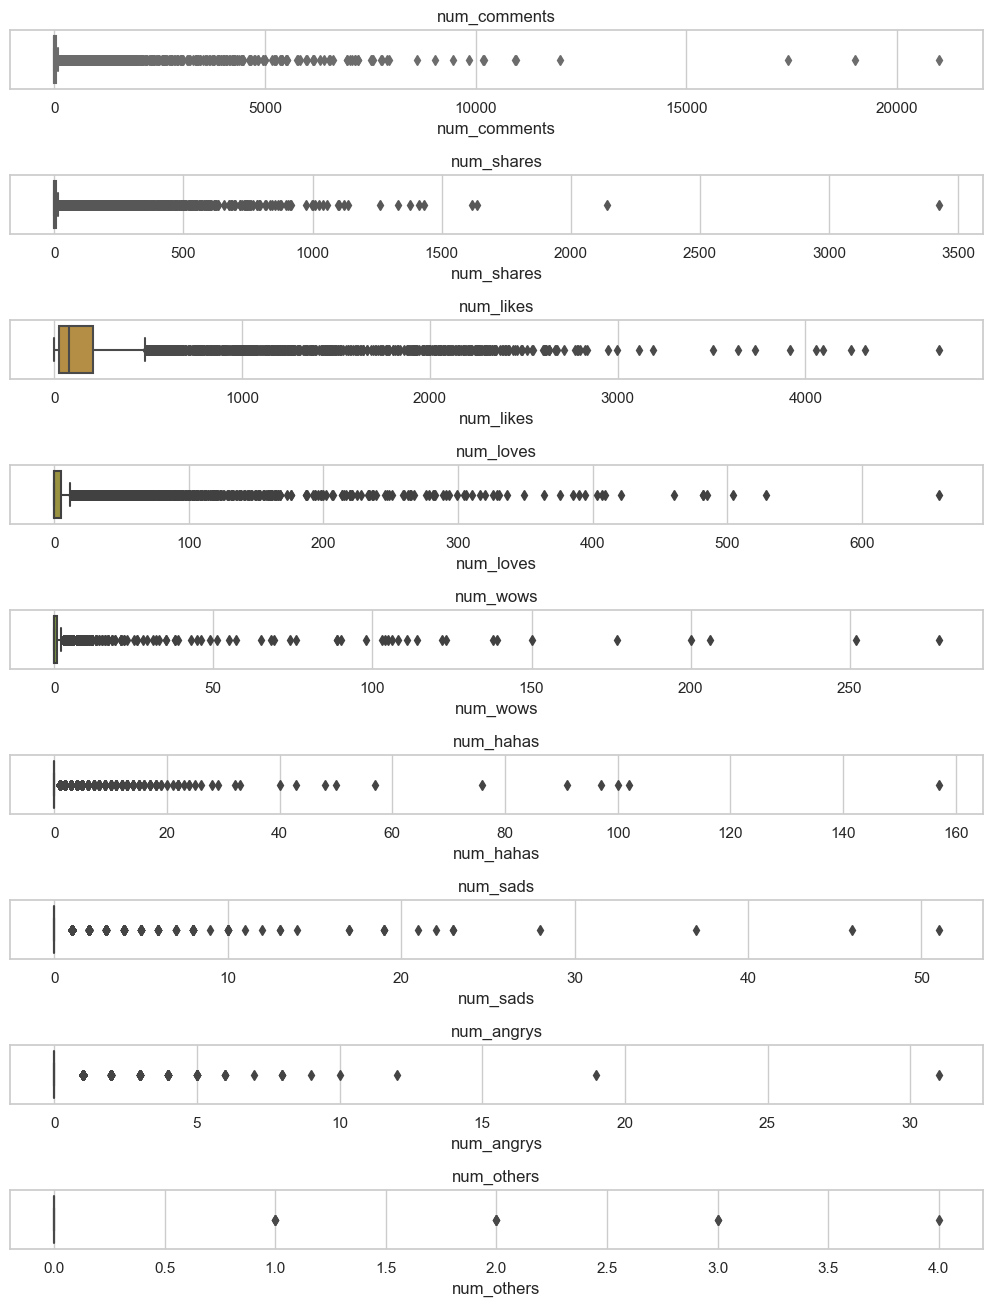

In [16]:
plt.figure(figsize=(20, 20))
palette = sns.color_palette("husl", n_colors=14)

for i, column in enumerate(columnas_numericas.columns):
    plt.subplot(14, 2, 2*i + 1)
    sns.boxplot(x=df[column], orient="h",color=palette[i])
    plt.title(f'{column}')
    plt.tight_layout()

In [17]:
for k, v in columnas_numericas.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))  

Column num_comments outliers = 20.54%
Column num_shares outliers = 20.83%
Column num_likes outliers = 11.14%
Column num_loves outliers = 18.31%
Column num_wows outliers = 10.68%
Column num_hahas outliers = 100.00%
Column num_sads outliers = 100.00%
Column num_angrys outliers = 100.00%
Column num_others outliers = 100.00%


Uno de los hallazgos más destacados de este estudio es la presencia de valores atípicos (outliers) en todas las variables. La mayoría de las publicaciones obtienen valores bajos de reacciones en general, pero existen algunas excepciones con valores significativamente más altos.

A continuación, examinaremos la distribución de los registros en las diferentes variables para determinar si siguen una distribución normal. Dado el tamaño de la muestra, que supera los 5000 registros, es más apropiado utilizar el test de Anderson-Darling en lugar del test de Shapiro. El test de Anderson-Darling tiende a ser más preciso en muestras grandes y proporciona una evaluación más robusta de la normalidad de los datos en estos casos.

In [18]:
from scipy.stats import anderson

for column in columnas_numericas.columns:
    data = columnas_numericas[column]
    result = anderson(data)
    
    print('Estadístico Anderson-Darling:', result.statistic)
    if result.statistic > result.critical_values[2]:
        print(f'La variable {column} \033[91mNO\033[0m sigue una distribución normal (rechaza H0)')
    else:
        print(f'La variable {column} sigue una distribución normal (no rechaza H0)')
    print('\n')

Estadístico Anderson-Darling: 1545.9253141225226
La variable num_comments NO sigue una distribución normal (rechaza H0)


Estadístico Anderson-Darling: 1441.4352523464822
La variable num_shares NO sigue una distribución normal (rechaza H0)


Estadístico Anderson-Darling: 1038.7278376510494
La variable num_likes NO sigue una distribución normal (rechaza H0)


Estadístico Anderson-Darling: 1359.1933048744413
La variable num_loves NO sigue una distribución normal (rechaza H0)


Estadístico Anderson-Darling: 1807.5001701109159
La variable num_wows NO sigue una distribución normal (rechaza H0)


Estadístico Anderson-Darling: 1678.4065944006534
La variable num_hahas NO sigue una distribución normal (rechaza H0)


Estadístico Anderson-Darling: 1859.0002271114845
La variable num_sads NO sigue una distribución normal (rechaza H0)


Estadístico Anderson-Darling: 1938.6178922349236
La variable num_angrys NO sigue una distribución normal (rechaza H0)


Estadístico Anderson-Darling: 2369.9275272858

En resumen, hemos observado que ninguna de las variables sigue una distribución normal, y todas presentan valores atípicos. Por lo tanto, hemos decidido utilizar la técnica de estandarización conocida como RobustScaler para procesar y normalizar estos datos. 

In [19]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
columnas_numericas_escala = scaler.fit_transform(columnas_numericas)
columnas_numericas_escala_df = pd.DataFrame(columnas_numericas_escala, columns=columnas_numericas.columns)

In [20]:
columnas_numericas_escala_df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_comments,6150.0,7.653517,28.952236,-0.183206,-0.152672,0.0,0.847328,640.732824
num_shares,6150.0,7.468889,23.327046,-0.166667,-0.166667,0.0,0.833333,570.500000
num_likes,6150.0,0.857543,2.497885,-0.427027,-0.297297,0.0,0.702703,25.032432
num_loves,6150.0,2.902081,8.497407,0.000000,0.000000,0.0,1.000000,131.400000
num_wows,6150.0,1.425854,9.295196,0.000000,0.000000,0.0,1.000000,278.000000
num_hahas,6150.0,0.794309,4.227142,0.000000,0.000000,0.0,0.000000,157.000000
num_sads,6150.0,0.264715,1.577357,0.000000,0.000000,0.0,0.000000,51.000000
num_angrys,6150.0,0.125366,0.733283,0.000000,0.000000,0.0,0.000000,31.000000
num_others,6150.0,0.003089,0.089215,0.000000,0.000000,0.0,0.000000,4.000000


En estudios de clustering es habitual realizar Análisis de Componentes Principales (PCA), por varias razones:
- Reducción de la dimensionalidad: PCA reduce la dimensionalidad de los datos al transformar las variables originales en un conjunto de nuevas variables no correlacionadas. Esto ayuda a lidiar con la "maldición de la dimensionalidad", donde altas dimensiones pueden afectar negativamente el rendimiento de los algoritmos de clustering.

- Eliminación de multicolinealidad: PCA elimina la multicolinealidad, ayuda a mitigar este problema al transformar las variables en componentes no correlacionados.

- Mejora de la interpretación: Los componentes principales generados por PCA son combinaciones lineales de las variables originales. Estos componentes suelen ser más interpretables, ya que representan direcciones en el espacio de características donde hay más variación en los datos.

- Eliminación de ruido: PCA puede ayudar a eliminar el ruido o la variabilidad no deseada en los datos, lo que puede mejorar la detección de patrones en el proceso de clustering.

- Aceleración del rendimiento: Al reducir la dimensionalidad de los datos, los algoritmos de clustering pueden ejecutarse más rápido, lo que es especialmente útil cuando se trabaja con grandes conjuntos de datos.

A continuación haremos un estudio de la varianza explicada acumulada con respecto al número de componentes.

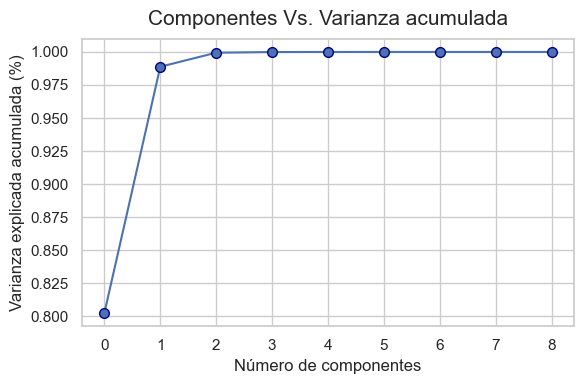

In [21]:
from sklearn.decomposition import PCA

pca = PCA().fit(columnas_numericas)
plt.figure(figsize = (6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = "o", markersize=7, markeredgecolor='darkblue')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada (%)')
plt.title("Componentes Vs. Varianza acumulada", fontsize=15, pad=10)
plt.tight_layout()

Observamos que la mayoría de la varianza podría ser explicada por una única componente, sin embargo, optamos por utilizar dos componentes para alcanzar el 100% de varianza explicada.

Una vez finalizada la transformación de las variables numéricas, las combinamos con las variables categóricas codificadas en formato dummy. Luego, realizamos una copia de este dataframe, que utilizaremos para construir nuestro modelo de clustering K-means.

In [22]:
pca = PCA(n_components=2)
columnas_numericas_pca = pca.fit_transform(columnas_numericas_escala_df)
columnas_numericas_pca_df = pd.DataFrame(data=columnas_numericas_pca, columns=[f'Componente_{i+1}' for i in range(2)])

dataframe_concatenado = pd.concat([columnas_categoricas, columnas_numericas_pca_df], axis=1)
dataframe_kmeans = dataframe_concatenado.copy()

K-Means es un algoritmo de aprendizaje automático ampliamente utilizado en el campo de la agrupación (clustering). Su objetivo principal es dividir un conjunto de datos en grupos o clústeres, de manera que los elementos dentro de un mismo grupo sean más similares entre sí que con aquellos de otros grupos. Saber el número óptimo de clústeres (k) en el algoritmo K-Means es fundamental por varias razones:

- Eficiencia del modelo: Determinar el valor correcto de k permite que el modelo sea más eficiente y preciso.

- Interpretación de resultados: Un número adecuado de clústeres facilita la interpretación de los resultados. Si tienes demasiados clústeres, puede ser difícil dar sentido a las agrupaciones, y si tienes muy pocos, puedes perder información importante.

- Optimización de recursos: Utilizar el número óptimo de clústeres puede ahorrar recursos computacionales, ya que no estarás calculando clústeres innecesarios.

Para encontrar el número óptimo de clústeres, emplearemos el método del codo. Esta técnica nos permite determinar la cantidad ideal de clústeres en un algoritmo de agrupación, como K-Means. Consiste en calcular la suma de las distancias al cuadrado entre los puntos de datos y sus centroides para diferentes valores de K (número de clústeres) y representar estos resultados en una gráfica. El "codo" en la gráfica suele ser un punto donde la curva se quiebra o forma un ángulo agudo. Este punto sugiere el número óptimo de clústeres, ya que indica el equilibrio entre la compacidad de los clústeres y la separación entre ellos.

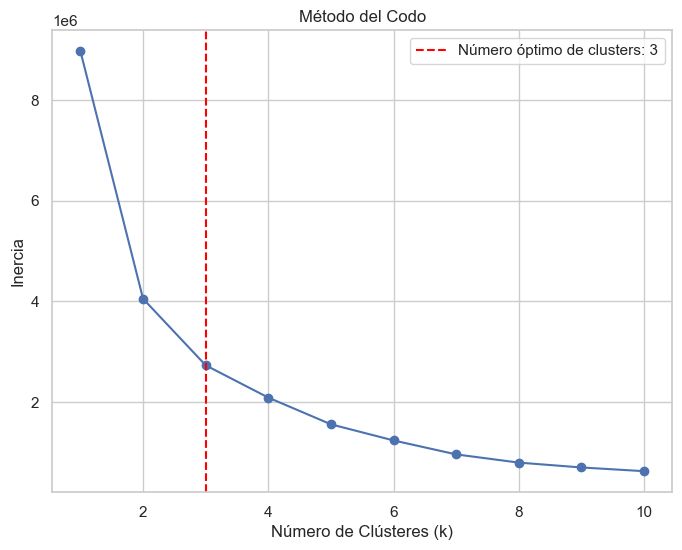

In [23]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

inercia = []
k_max = 10

for k in range(1, k_max + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(dataframe_kmeans)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, k_max + 1), inercia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')

knee_l = KneeLocator(range(1, k_max + 1), inercia, curve="convex", direction="decreasing")
plt.axvline(x=knee_l.elbow, color='red', linestyle='--', label=f'Número óptimo de clusters: {knee_l.elbow}')
plt.legend()

El metodo del codo nos aconseja utilizar una k=3, también podemos emplear el coeficiente Silhouette para anticipar cuál es el número óptimo de clústeres. A continuación, desarrollaremos una función que calcula y visualiza los puntajes de Silhouette en relación con el número de clústeres (K) en el contexto de K-Means. Esto nos permitirá compararlos con los resultados del método del codo y elegir la k que creamos mas oportuna para nuestro estudio.

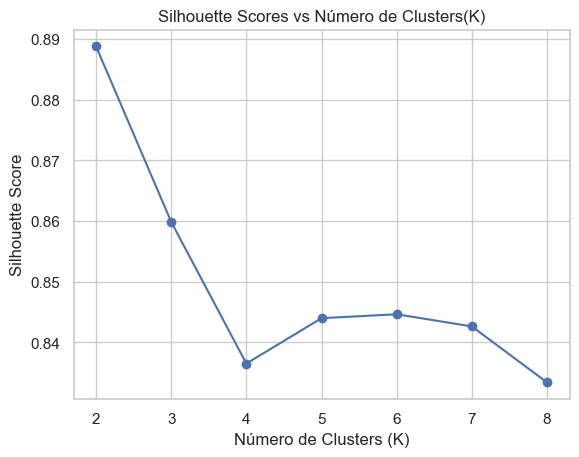

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def plot_silhouette(data, k_values):
    silhouette_scores = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=45)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    plt.plot(k_values, silhouette_scores, 'bo-')
    plt.xlabel('Número de Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores vs Número de Clusters(K)')
    plt.show()

k_values = list(range(2, 9))
plot_silhouette(dataframe_kmeans, k_values)

Observamos que el valor más alto se obtiene en k=2, a diferencia del método del codo que sugería k=3. Esta discrepancia se debe a las distintas formas en que evalúan la estructura de los datos:
- El método del codo se basa en la variación dentro de los clústeres en función de la cantidad de clústeres. Busca el punto en el que la adición de un clúster adicional ya no proporciona una reducción significativa en la variación dentro del clúster.
- El coeficiente Silhouette, por otro lado, evalúa la cohesión y la separación entre los clústeres. Un valor Silhouette más alto indica una mejor estructura de clúster.

Ahora que hemos analizado ambas métricas, debemos decidir cuál valor de k seleccionar para K-Means. Aunque k=2 ofrece una mejor separación de clústeres, optaré por k=3. Esto se debe a que el método del codo sugiere que agregar un clúster adicional aporta una variación significativa en los datos.

Una vez que hayamos formado los clústeres, visualizaremos la gráfica en relación a las dos componentes resultantes de la PCA. Además, destacaremos los centroides de cada uno de estos clústeres en la gráfica. Los centroides son puntos centrales que representan las ubicaciones centrales de los clústeres y son fundamentales para comprender la estructura de los datos agrupados.

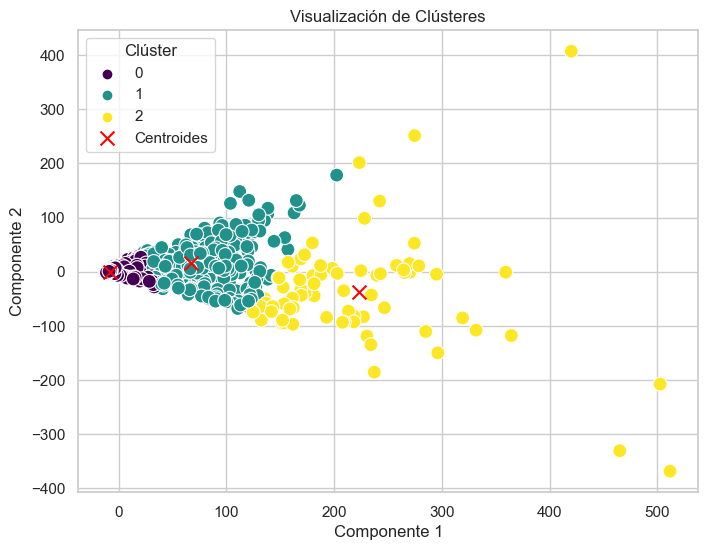

In [25]:
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
kmeans.fit(dataframe_kmeans)

etiquetas = kmeans.labels_
centroides = kmeans.cluster_centers_ 
dataframe_kmeans['Cluster'] = etiquetas

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Componente_1', y='Componente_2', data=dataframe_kmeans, hue='Cluster', palette='viridis', s=100)
plt.title('Visualización de Clústeres')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.scatter(centroides[:, 5], centroides[:, 6], c='red', marker='x', s=100, label='Centroides')
plt.legend(title='Clúster')

En el gráfico no se observa con claridad cuantos puntos hay en cada cluster, veamos como han quedado repartidos.

Text(0.5, 1.0, 'Recuento de Registros por Cluster')

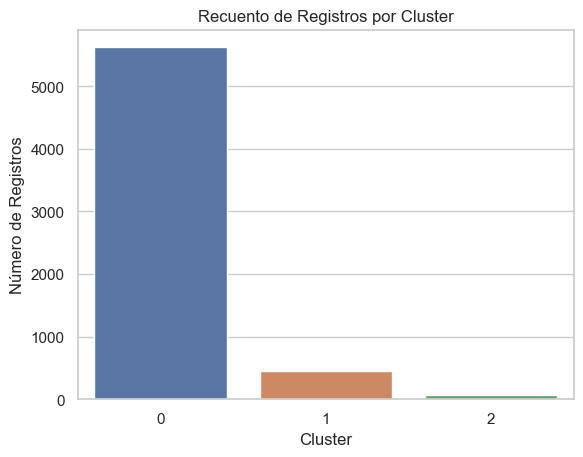

In [26]:
cluster_counts = dataframe_kmeans['Cluster'].value_counts()

sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Número de Registros')
plt.title('Recuento de Registros por Cluster')

A pesar de que el 'cluster 0' ocupa un espacio reducido en la gráfica de visualización de los clusteres, destaca por la presencia de un número considerablemente mayor de registros en comparación con los otros. La proximidad de los puntos dentro del 'cluster 0' sugiere que estos registros comparten similitudes sustanciales entre sí. Por otro lado, en los otros clústeres, se observan valores atípicos y una menor similitud entre los registros.

Ahora, a través de diversas visualizaciones, intentaremos comprender las características distintivas de cada clúster.

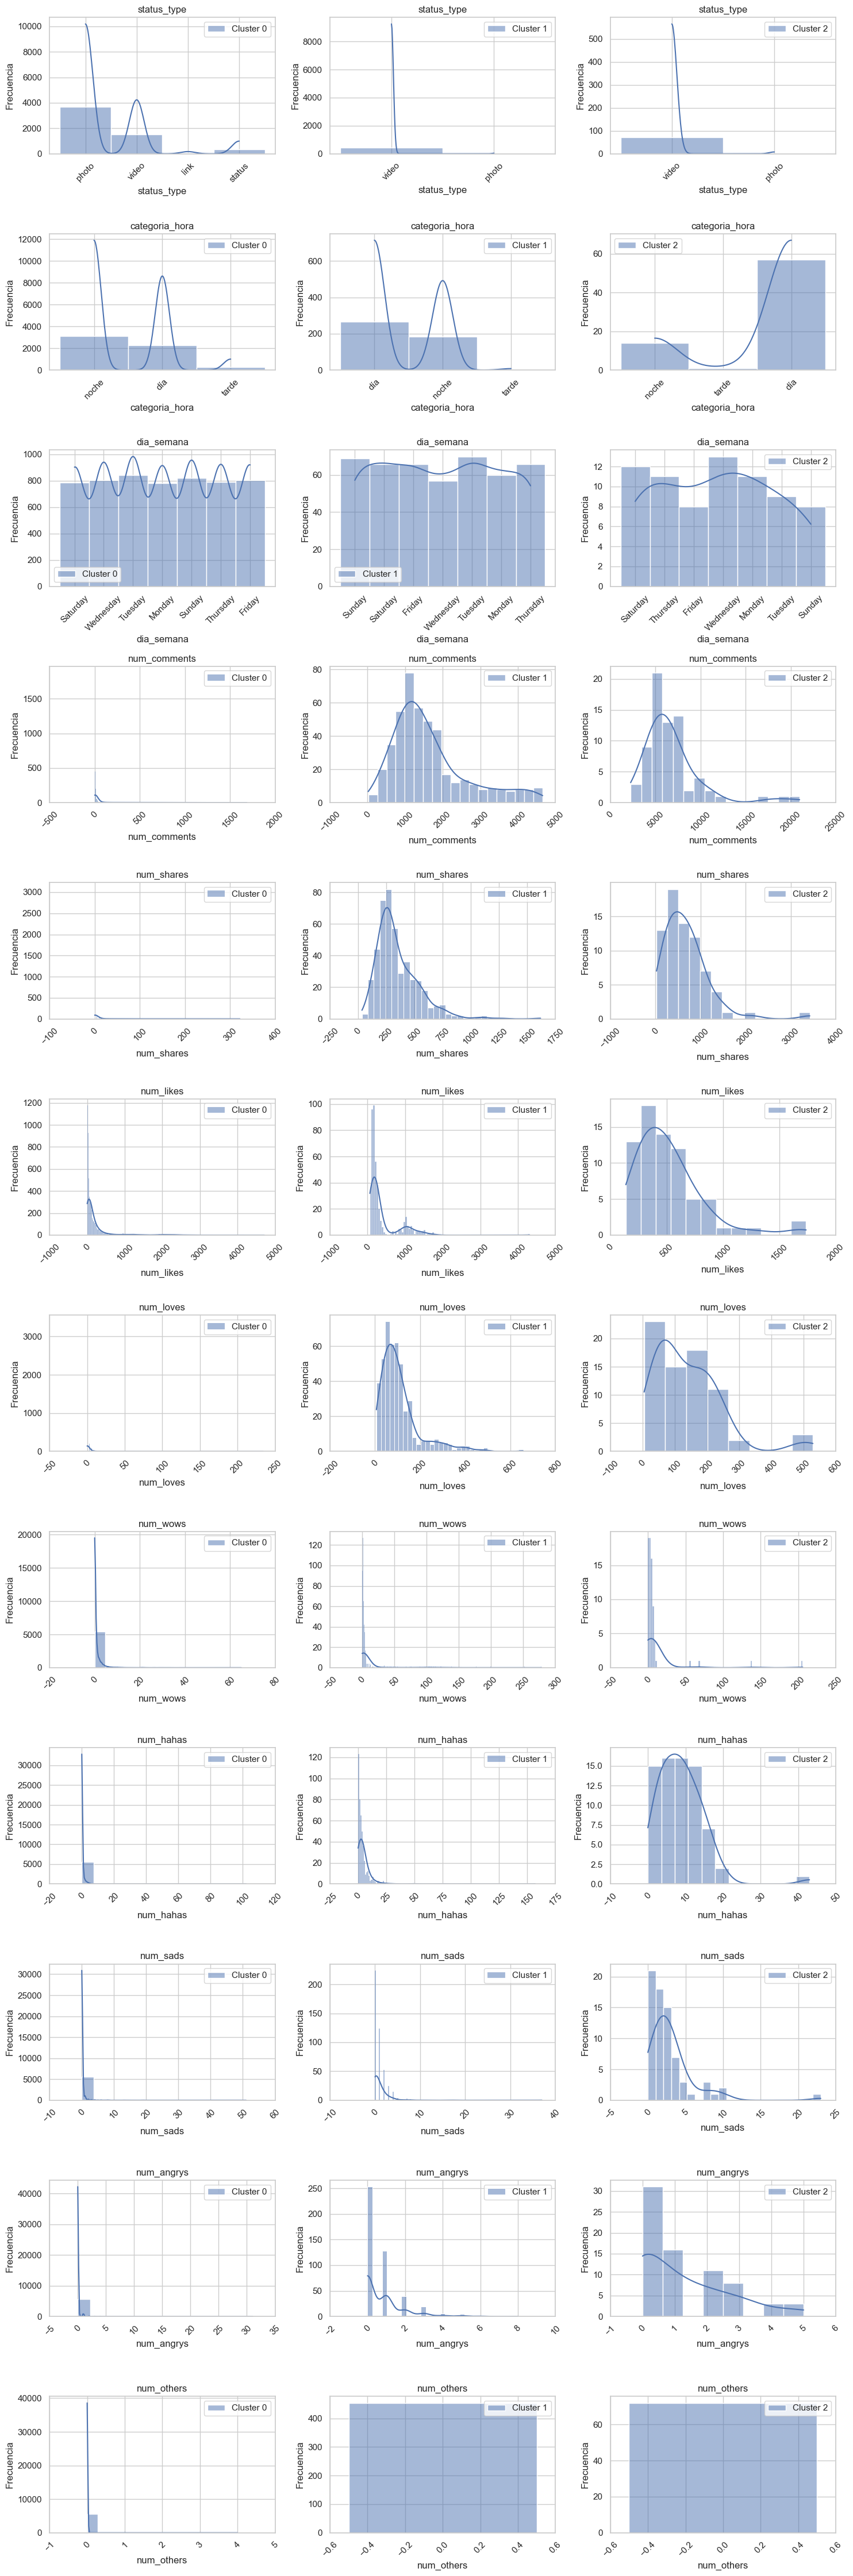

In [27]:
df['cluster_kmeans'] = dataframe_kmeans['Cluster']
numeric_columns = [col for col in df.columns if col != 'cluster_kmeans']

clusters_of_interest = [0, 1, 2]
fig, axes = plt.subplots(12, 3, figsize=(15, 45))

for i, variable in enumerate(numeric_columns):
    for j, cluster in enumerate(clusters_of_interest):
        cluster_data = df[df['cluster_kmeans'] == cluster]
        sns.histplot(data=cluster_data, x=variable, kde=True, label=f'Cluster {cluster}', ax=axes[i, j])
        
        axes[i, j].set_xlabel(variable)
        axes[i, j].set_ylabel('Frecuencia')
        axes[i, j].set_title(variable)
        axes[i, j].legend()
        axes[i, j].set_xticks(axes[i, j].get_xticks())
        axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=45)
        
plt.tight_layout()

Después de analizar las gráficas, podemos concluir que la diferencia más destacada entre los clústeres radica en la variable 'comentarios'. En el clúster 0, la mayoría de las publicaciones tienen menos de 100 comentarios. En el clúster 1, las publicaciones oscilan entre 100 y 500 aproximadamente, mientras que en el clúster 2 se encuentran las publicaciones con más de 5000 comentarios..

## Exercici 2
**Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.**

En el caso del clustering jerárquico, utilizaremos el mismo dataframe con las variables preprocesadas y crearemos una copia para nuestros análisis. A diferencia de K-Means, en este modelo, comenzaremos evaluando los puntajes del coeficiente Silhouette en función del número de clústeres para determinar el número óptimo de clústeres en el modelo.

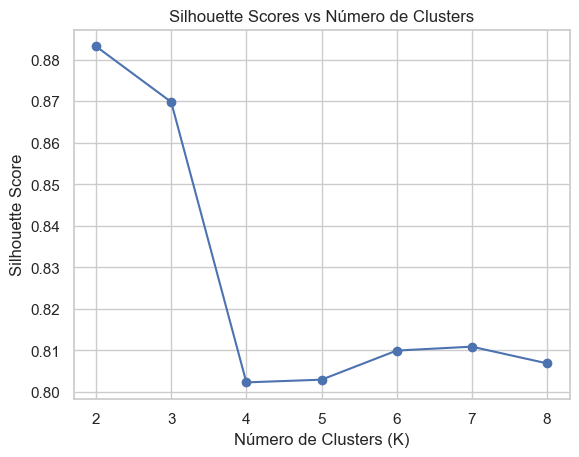

In [28]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import AgglomerativeClustering

dataframe_jerarquico = dataframe_concatenado.copy()

def plot_silhouette_agglo(data, k_values):
    silhouette_scores = []

    for k in k_values:
        agglo = AgglomerativeClustering(n_clusters=k ,metric='euclidean', linkage='ward')
        cluster_labels = agglo.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    plt.plot(k_values, silhouette_scores, 'bo-')
    plt.xlabel('Número de Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores vs Número de Clusters')
    plt.show()

k_values = list(range(2, 9))
plot_silhouette_agglo(dataframe_jerarquico, k_values)

En este escenario, disponemos de una única métrica para determinar el número de clústeres. Nuevamente, observamos que la diferencia entre 2 y 3 es mínima, pero dado que Silhouette sugiere 2 clústeres, optaremos por esta opción para obtener clústeres más compactos y definidos. A continuación dibujaremos el dendograma resultante.

Text(0, 0.5, 'Distancia')

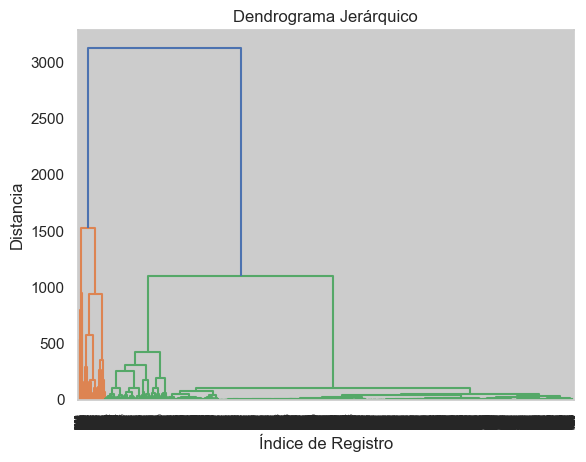

In [29]:
linked = linkage(dataframe_jerarquico, method='ward')
n_clusters = 2 
cluster_labels = fcluster(linked, n_clusters, criterion='maxclust')
dataframe_jerarquico['cluster'] = cluster_labels

dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma Jerárquico')
plt.xlabel('Índice de Registro')
plt.ylabel('Distancia')

Después de completar el proceso de clustering, generaremos una gráfica para observar las disparidades en la cantidad de registros asignados a cada uno de los clústeres.

Text(0.5, 1.0, 'Recuento de Registros por Cluster')

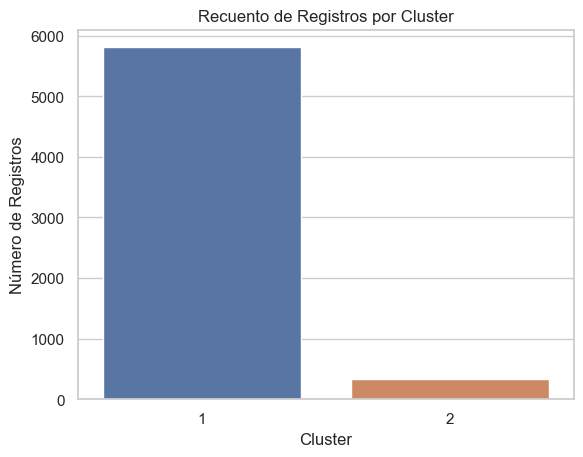

In [30]:
cluster_counts = dataframe_jerarquico['cluster'].value_counts()

sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Número de Registros')
plt.title('Recuento de Registros por Cluster')

Observamos que el número de registros en el Cluster 1 es inmesamente mayor. A continuación, analicemos como quedan repartidos las muestras en los distintos clústeres.

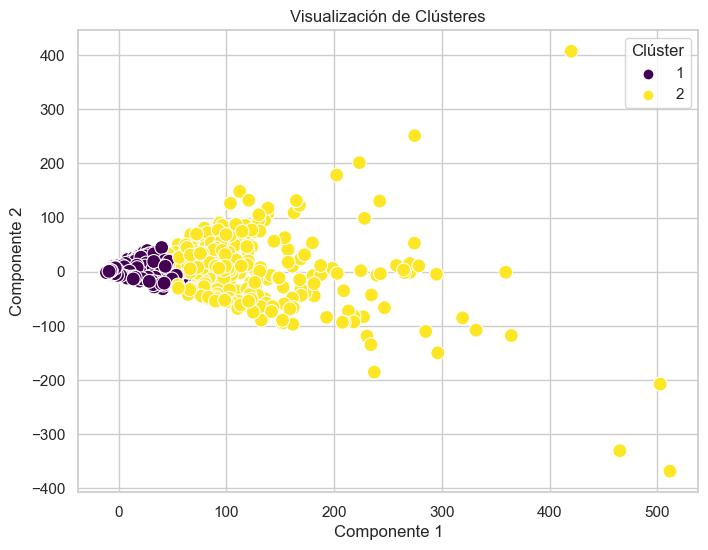

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Componente_1', y='Componente_2', data=dataframe_jerarquico, hue='cluster', palette='viridis', s=100)
plt.title('Visualización de Clústeres')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clúster')

Al igual que en el caso de K-Means, el clúster mayoritario se encuentra en un espacio muy reducido, ya que agrupa a la gran mayoría de las instancias, en contraste con aquellas publicaciones que reciben un alto número de reacciones y comentarios, que son una minoría. Vamos a intentar verificar esta observación mediante la ayuda de gráficos.

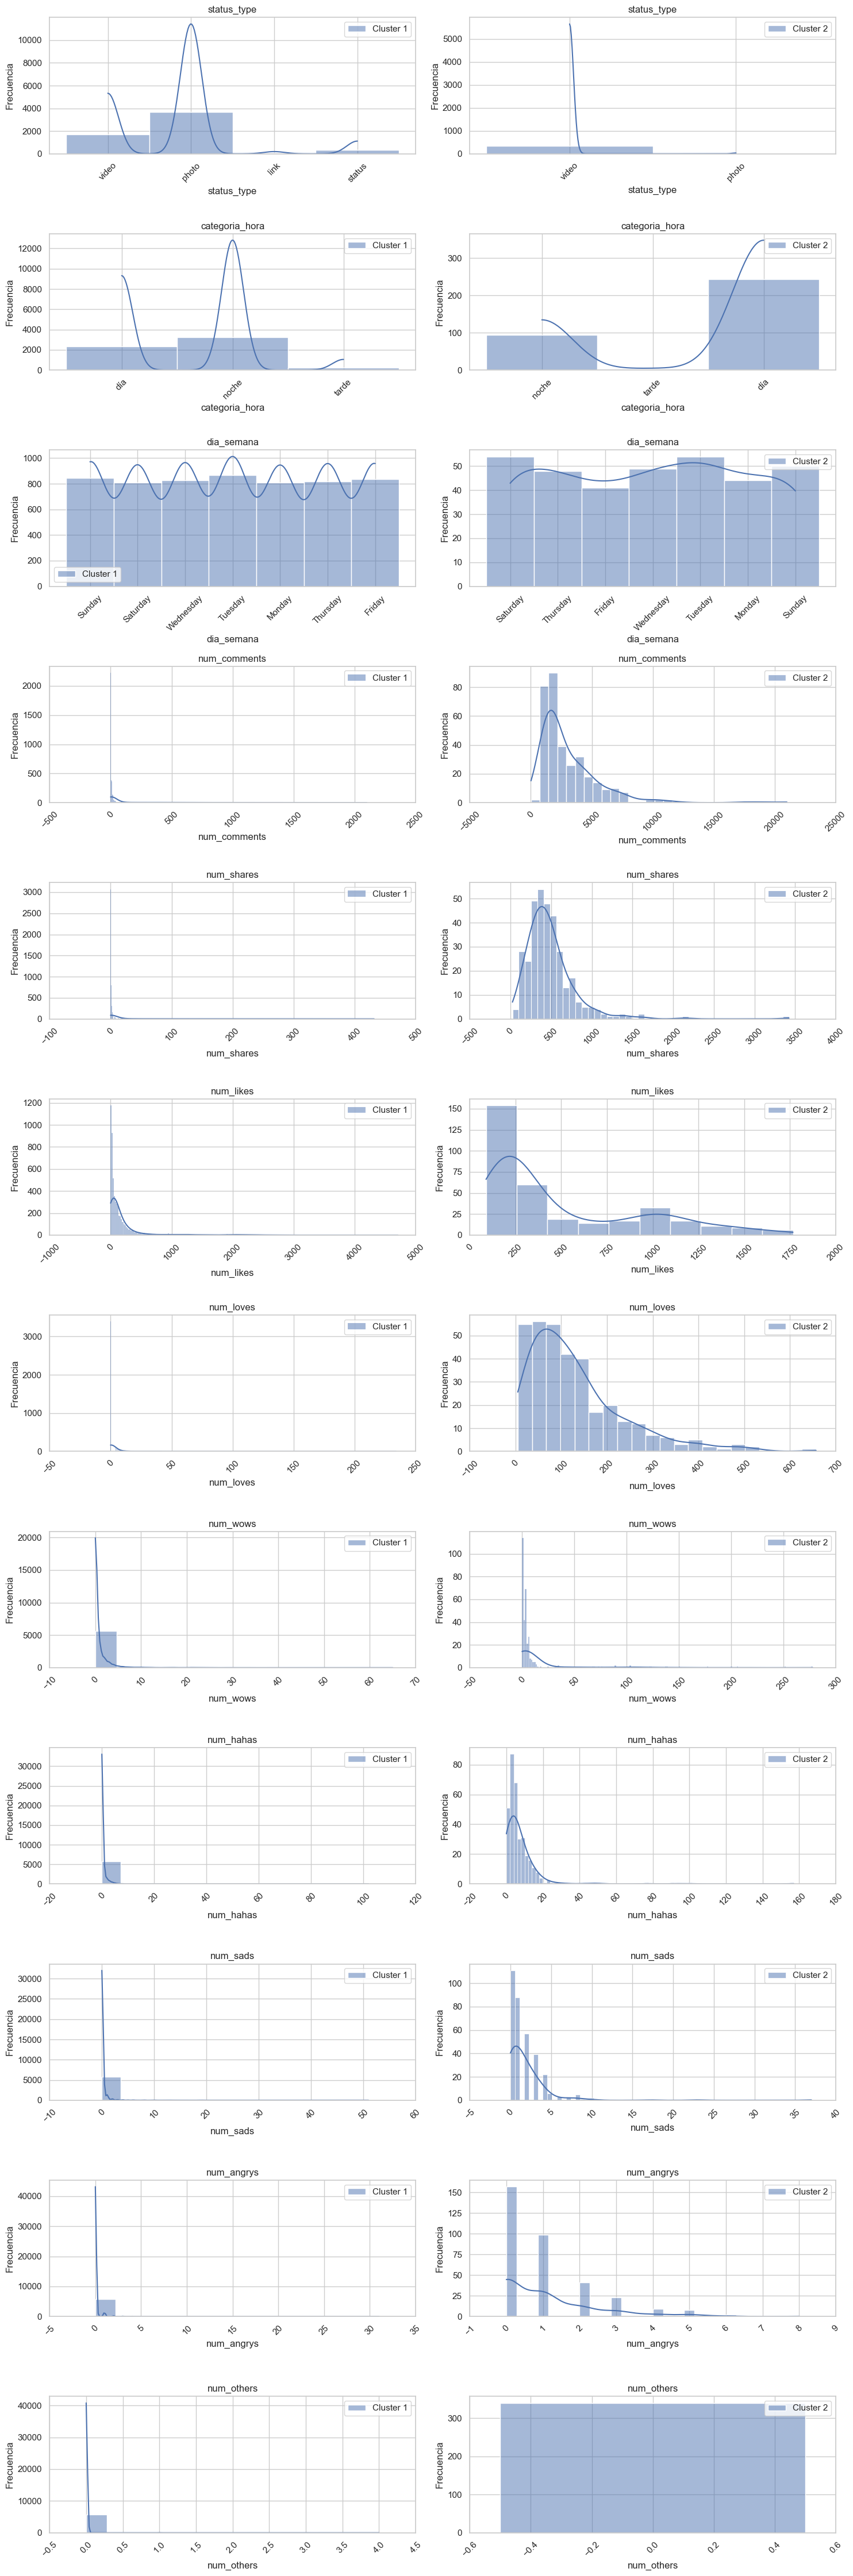

In [32]:
df['cluster_jerarquico'] = dataframe_jerarquico['cluster']
numeric_columns = [col for col in df.columns if col not in ['cluster_kmeans','cluster_jerarquico']]

clusters_of_interest = [1, 2]
fig, axes = plt.subplots(12, 2, figsize=(15, 45))

for i, variable in enumerate(numeric_columns):
    for j, cluster in enumerate(clusters_of_interest):
        cluster_data = df[df['cluster_jerarquico'] == cluster]
        sns.histplot(data=cluster_data, x=variable, kde=True, label=f'Cluster {cluster}', ax=axes[i, j])
        
        axes[i, j].set_xlabel(variable)
        axes[i, j].set_ylabel('Frecuencia')
        axes[i, j].set_title(variable)
        axes[i, j].legend()
        axes[i, j].set_xticks(axes[i, j].get_xticks())
        axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=45)
        
plt.tight_layout()

Correcto, las principales diferencias entre los dos grupos se reflejan en el número de comentarios y compartidos. En el cluster 1, los registros suelen tener pocos comentarios y han sido compartidos en menor medida, mientras que en el cluster 2 se encuentran las publicaciones que han tenido un mayor éxito en términos de interacciones.

Una vez tenemos los dos modelos de clustering procedo a hacer un breve analisis de comparación entre ambos. Para ello dibujaremos la matriz de correlacion del dataframe con los valores del clustering de cada modelo.

<Axes: >

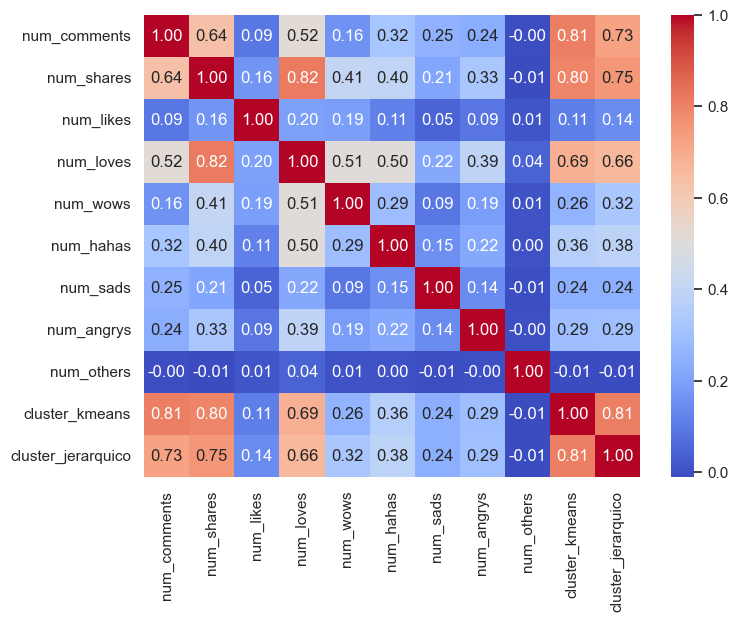

In [33]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap='coolwarm')

En primer lugar, destaca la notable correlación entre ambos modelos, lo que sugiere que, a pesar de tener un número diferente de clústeres, la distribución es bastante similar. Como ya comentamos anteriormente en ambos casos, las correlaciones más altas se encuentran en el número de comentarios y compartidos.

Para concluir, vamos a crear dos gráficos para visualizar cómo se distribuyen los clústeres en cada uno de los modelos en función de las variables 'num_comments' y 'num_shares'.

<Axes: xlabel='num_comments', ylabel='num_shares'>

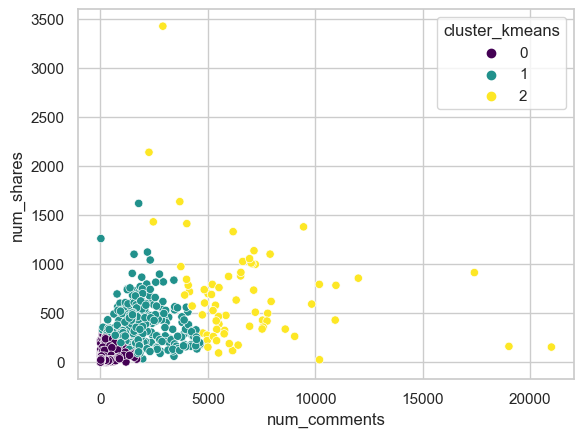

In [34]:
sns.scatterplot(x='num_comments', y='num_shares', data=df, hue='cluster_kmeans', palette='viridis')

<Axes: xlabel='num_comments', ylabel='num_shares'>

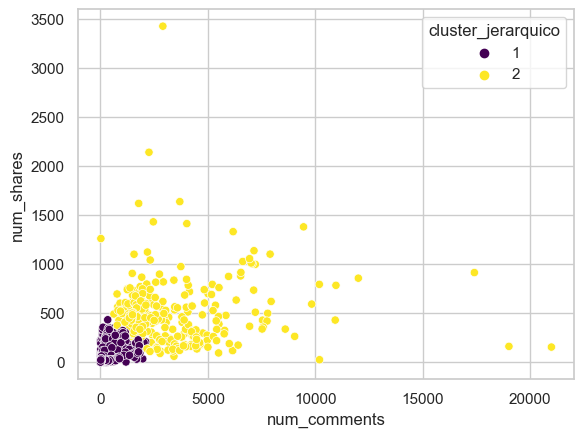

In [35]:
sns.scatterplot(x='num_comments', y='num_shares', data=df, hue='cluster_jerarquico', palette='viridis')

## Exercici 3
**Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.**


A pesar de que el coeficiente Silhouette ya se utilizó en ambos modelos para ayudar a determinar el número de clústeres, aquí presentamos el valor final para cada uno de los modelos de clustering.

In [36]:
silhouette_kmeans = silhouette_score(dataframe_kmeans, dataframe_kmeans['Cluster'])
silhouette_jerarquico = silhouette_score(dataframe_jerarquico, cluster_labels)
print(f'Coeficiente de Silhouette para el modelo K-means: {silhouette_kmeans}')
print(f"Coeficiente de Silhouette para el clustering jerarquico: {silhouette_jerarquico}")

Coeficiente de Silhouette para el modelo K-means: 0.8553353039552734
Coeficiente de Silhouette para el clustering jerarquico: 0.8831981520590199


Como observamos, los valores son bastante similares. Es importante destacar que el coeficiente Silhouette es más alto en el clustering jerárquico. Esto se debe a que en K-means elegimos un número mayor de clústeres, como sugería el método del codo, a pesar de que el coeficiente Silhouette era ligeramente más bajo.


En resumen, ambos modelos han arrojado resultados sólidos y, al mismo tiempo, muy similares entre sí.